## Zadanie 5 - filtrowanie sygnału ##


In [2]:
import numpy as np
from scipy.signal import chirp, spectrogram
from copy import deepcopy
import matplotlib.pyplot as plt

• Zademonstruj działanie algorytmu FFT dla zadanego sygnału (ciągu liczbowego) wyświetlając wykres
częstotliwości.

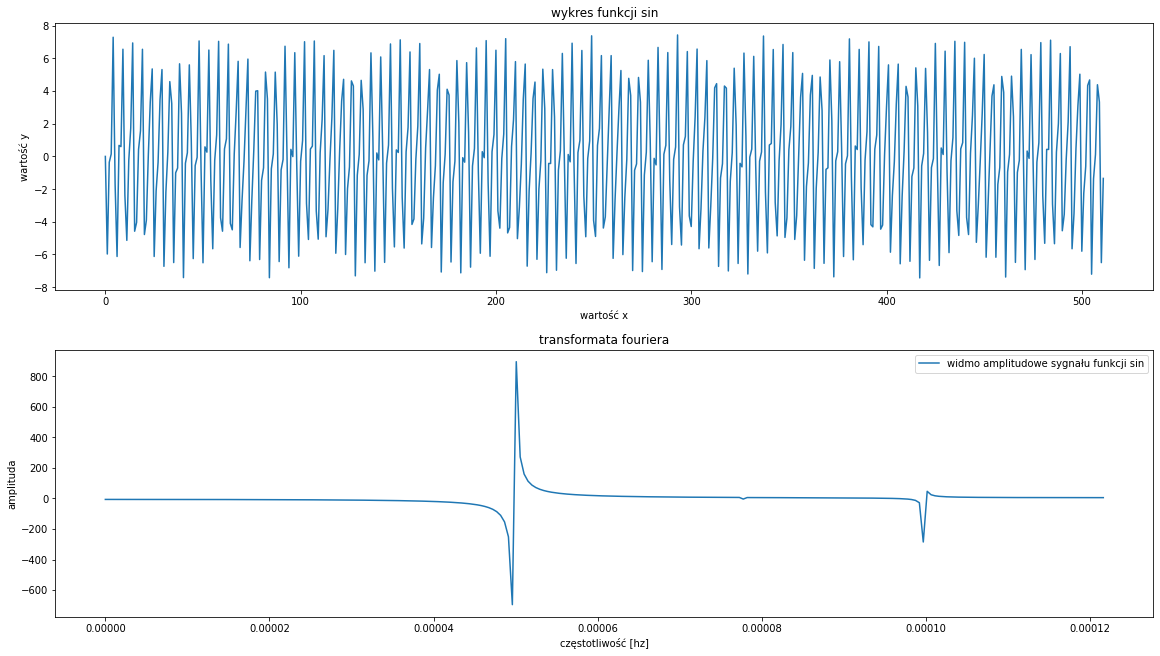

In [12]:
N = 512 # liczba probek
x_values = np.arange(0, N, 1)
SAMPLE_RATE = 4096
x2 = 3*np.sin(10*x_values)
x2 += .5*np.sin(2*x_values)
x2 += 5*np.sin(5*x_values)
fft2 = np.fft.fft(x2)
f2 = np.fft.fftfreq(N, SAMPLE_RATE)
_, plots = plt.subplots(2,figsize=(16, 9),constrained_layout=True)
plots[0].plot(x_values, x2)
plots[0].set_title('wykres funkcji sin')
plots[0].set_xlabel('wartość x')
plots[0].set_ylabel('wartość y')
plots[1].plot(f2[:int(N/2)], np.real(fft2[:int(N/2)]))
plots[1].legend(['widmo amplitudowe sygnału funkcji sin'])
plots[1].set_title('transformata fouriera')
plots[1].set_xlabel('częstotliwość [hz]')
plots[1].set_ylabel('amplituda')
plt.show()

Wykorzystaj FFT do filtracji zadanego sygnału – tzn. usunięcia wybranych częstotliwości. Wykonaj
następujące czynności:
– wczytaj próbki sygnału,
– wykonaj szybką transformację Fouriera,
– usuń wybrane częstotliwości,
– wykonaj odwrotną szybką transformację Fouriera w celu odtworzenia sygnału w dziedzinie czasu.

In [13]:
fs = 20000
T = 1
t = np.arange(0, int(T*fs)) / fs
w = chirp(t, f0=20, f1=5000, t1=1, method='linear')
fft1 = np.fft.fft(w)
f1 = np.linspace(0, len(w), 20000)
fft2 = deepcopy(fft1[:])
for i in range(len(f1)):
    if f1[i] > 4000 or f1[i] < 1000: # cut off all frequencies higher than 0.005
        fft2[i] = 0.0
inverse = np.fft.ifft(fft2)

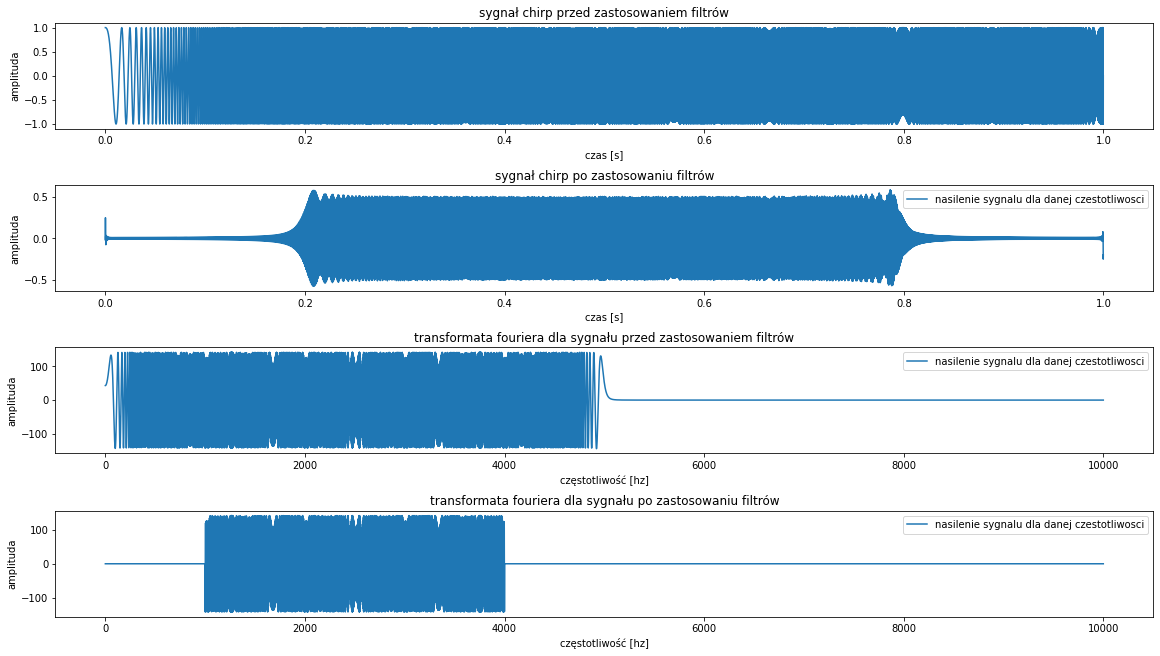

In [18]:
_, plots = plt.subplots(4, figsize=(16, 9),constrained_layout=True)
plots[0].set_title('sygnał chirp przed zastosowaniem filtrów')
plots[0].set_xlabel('czas [s]')
plots[0].set_ylabel('amplituda')
plots[0].plot(t,w)
plots[1].set_title('sygnał chirp po zastosowaniu filtrów')
plots[1].set_xlabel('czas [s]')
plots[1].set_ylabel('amplituda')
plots[1].plot(t, np.real(inverse))
plots[1].legend(['nasilenie sygnalu dla danej czestotliwosci'])
plots[2].set_xlabel('częstotliwość [hz]')
plots[2].set_ylabel('amplituda')
plots[2].set_title('transformata fouriera dla sygnału przed zastosowaniem filtrów')
plots[2].plot(f1[:int(len(f1)/2)], np.real(fft1[:int(len(f1)/2)]))
plots[2].legend(['nasilenie sygnalu dla danej czestotliwosci'])
plots[3].set_xlabel('częstotliwość [hz]')
plots[3].set_ylabel('amplituda')
plots[3].set_title('transformata fouriera dla sygnału po zastosowaniu filtrów')
plots[3].plot(f1[:int(len(f1)/2)], np.real(fft2[:int(len(f1)/2)]))
plots[3].legend(['nasilenie sygnalu dla danej czestotliwosci'])